### THE PROBLEM STATEMENT 

The objective is to use insurance data to predict the health insurance cost incurred by individuals based on their age, gender, BMI, number of children, smoking habit and geolocation.

The available fatures are:
sex: insurance contractor gender
bmi: body mass index (ideally 18.5 to 24.9)
children: number of children covered by health insurance / number of dependents
smoker: smoking
region: the beneficiary's residential area in the US, nortest, southeast, southwest, northwest.

Target (output): 
charges: individual medical costs billed by health insurance.

### IMPORT LIBRARIES AND DATASETS

In [89]:
import pandas as pd # load and manipulate data 
import numpy as np # calculate the mean and standard deviation

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge

import sklearn.metrics as metrics # import metrics 
from sklearn.metrics import confusion_matrix # confusion matrix

import warnings # import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import plotly.graph_objects as go

import plotly.io as pio


In [130]:
# read the csv file 
insurance_df=pd.read_csv("expenses.csv")
insurance_df.head(50)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### EXPLORATORY DATA ANALYSIS

In [132]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [133]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [134]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [135]:
insurance_df.select_dtypes(include=['object']).describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [136]:
df_region=insurance_df.groupby("region").mean()
df_region

C:\Users\ARCHITECTURE\AppData\Local\Temp\ipykernel_18460\1540884162.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [137]:
df_age=insurance_df.groupby("age").mean()
df_age.T

C:\Users\ARCHITECTURE\AppData\Local\Temp\ipykernel_18460\3095683646.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
bmi,31.326159,28.596912,30.632759,28.185714,31.087679,31.454464,29.142679,29.693929,29.428929,29.333571,...,31.950000,31.600962,30.844423,32.718200,30.572000,30.332826,32.548261,32.342609,31.923478,32.976136
children,0.449275,0.426471,0.862069,0.785714,0.714286,1.000000,0.464286,1.285714,1.071429,0.964286,...,0.961538,0.769231,0.615385,0.240000,1.200000,0.347826,0.739130,0.565217,0.565217,0.772727
charges,7086.217556,9747.909335,10159.697736,4730.464330,10012.932802,12419.820040,10648.015962,9838.365311,6133.825309,12184.701721,...,16164.545488,15025.515837,16447.185250,13878.928112,18895.869532,21979.418507,22024.457609,19163.856573,19884.998461,23275.530837


### EXPLORATORY DATA ANALYSIS WITH VISUALIZATION

In [138]:
insurance_df["smoker"]=insurance_df["smoker"].apply(lambda x:"non-smoker" if x=="no" else "smoker")  # convert categorical variable to numerical
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,smoker,southwest,16884.92400
1,18,male,33.770,1,non-smoker,southeast,1725.55230
2,28,male,33.000,3,non-smoker,southeast,4449.46200
3,33,male,22.705,0,non-smoker,northwest,21984.47061
4,32,male,28.880,0,non-smoker,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,non-smoker,northwest,10600.54830
1334,18,female,31.920,0,non-smoker,northeast,2205.98080
1335,18,female,36.850,0,non-smoker,southeast,1629.83350
1336,21,female,25.800,0,non-smoker,southwest,2007.94500


In [139]:
config = {'displayModeBar': False}

fig = px.treemap(insurance_df, path=[px.Constant('Insurane Cost in America by Region, Gender, Being a Smoker, and Age'), 'region', 'sex', 'smoker', 'age'], values='charges',
                  color='charges', hover_data=['children'],
                  color_continuous_scale='RdBu_r',
                  color_continuous_midpoint=np.average(insurance_df['charges'], weights=insurance_df['children']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show(config=config)

pio.write_html(fig, file="mytreemap.html", auto_open=False)

In [140]:
insurance_df["smoker"]=insurance_df["smoker"].apply(lambda x:0 if x=="non-smoker" else 1)  # convert categorical variable to numerical
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [141]:
px.defaults.template = "plotly_white"



fig=px.histogram(insurance_df, x='charges', color='smoker', opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box', 
                 title="Distribution of Insurance Costs by Smoking Status",
                 color_discrete_sequence=['#B14B51','#B7A294']) 
fig.update_layout(font_color="#303030", xaxis_title='Insurance Cost',
                  yaxis=dict(title='Probability Density', gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""))
fig.update_xaxes(showgrid=False, zerolinecolor='#EAEAEA')

pio.write_html(fig, file="myhistogram1.html", auto_open=False)

fig.show()



In [142]:
px.defaults.template = "plotly_white"

fig = px.box(insurance_df, x="age", y="charges", color="sex", 
             notched=True, points="outliers", height=600,
             title="Cost Distribution over Age Factor",
             color_discrete_sequence=['#B14B51', '#D0A99C', '#5D8370', '#6C839B'])
fig.update_traces(marker=dict(size=10, opacity=0.5, line=dict(width=3,color="#F7F7F7")), showlegend=False)
fig.update_layout(font_color="#303030", xaxis_title='Age Factor', yaxis_title='Insurance Cost',
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'))
fig.show()

fig.write_html("boxcost_and_age.html")

In [143]:
fig=px.histogram(insurance_df, x='charges', color='sex', opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box', 
                 title="Probability Density of Insurance Cost by Gender",
                 color_discrete_sequence=['#B14B51','#B7A294']) 
fig.update_layout(font_color="#303030", xaxis_title='Insurance Cost',
                  yaxis=dict(title='Probability Density', gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'),
                  legend=dict(orientation="h", yanchor="bottom", y=0.6, xanchor="right", x=0, title=""))
fig.update_xaxes(showgrid=False, zerolinecolor='#EAEAEA')
fig.show()

fig.write_html("histogram_cost and gender.html")

In [144]:
plot_df = insurance_df.copy()
plot_df["Age_Group"]=['18 to 29 years' if (i>=18)&(i<30) else '30 to 44 years' if (i>=30)&(i<45) else '45 to 59 years' if (i>=45)&(i<60) else '60 and over' for i in insurance_df['age']]

plot_df = plot_df.groupby(['Age_Group','sex'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('sex', ascending=True)
fig = px.bar(plot_df, x='Age_Group', y='charges', color='sex', height=500, text='charges', 
             opacity=0.75, barmode='group', color_discrete_sequence=['#B7A294','#B14B51'],
             title="Average Insurance Cost by Age and Gender")
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside', 
                  marker_line=dict(width=1, color='#303030'))
fig.update_layout(font_color="#303030",bargroupgap=0.05, bargap=0.3, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""),
                  xaxis=dict(title='Age Groups',showgrid=False), 
                  yaxis=dict(title='Insurance Cost', showgrid=False,zerolinecolor='#DBDBDB',
                             showline=True, linecolor='#DBDBDB', linewidth=2))
fig.show()

fig.write_html("cost and age groups.html")

In [145]:
fig=px.histogram(insurance_df, x='charges', color='region', opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box', 
                 title="Probability Density of Insurance Cost by Regions",
                 color_discrete_sequence=["#FFE7CC", "#9E726F", "#F8CBA6", "#D6B2B1"]) 
fig.update_layout(font_color="#303030", xaxis_title='Insurance Cost',
                  yaxis=dict(title='Probability Density', gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'),
                  legend=dict(orientation="h", yanchor="bottom", y=0.6, xanchor="right", x=0, title=""))
fig.update_xaxes(showgrid=False, zerolinecolor='#EAEAEA')

fig.update_layout(legend=dict(
    yanchor="bottom",
    y=1.05,
    xanchor="center",
    x=0.145))

fig.show()

fig.write_html("cost and region.html")

C:\Users\ARCHITECTURE\AppData\Local\Temp\ipykernel_18460\521658539.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\ARCHITECTURE\AppData\Local\Temp\ipykernel_18460\521658539.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



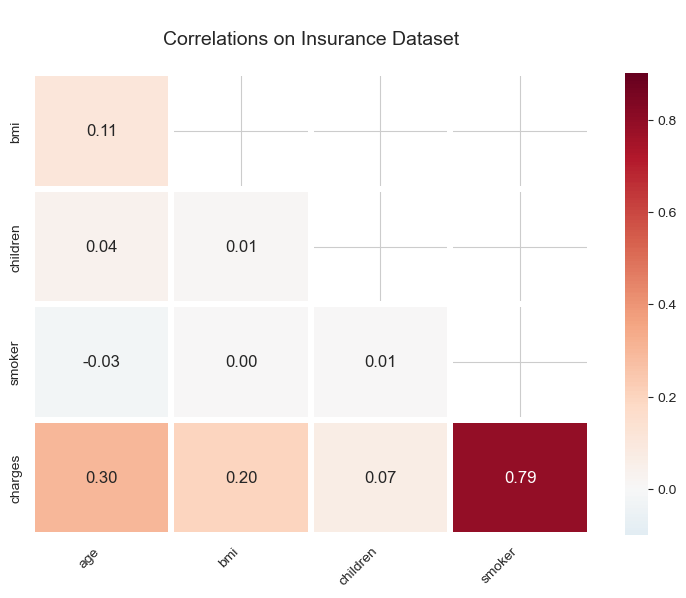

In [146]:
px.defaults.template = "plotly_white"

fig, ax = plt.subplots(figsize=(9,6))  
 
corr=insurance_df.corr()

mask=np.triu(np.ones_like(corr, dtype=bool))[1:, :-1]
corr=corr.iloc[1:,:-1].copy()
ax=sns.heatmap(corr, mask=mask, vmin=-.1, vmax=.9, center=0, annot=True, fmt='.2f', 
               cmap='RdBu_r', linewidths=4, annot_kws={"fontsize":12})
ax.set_title('\nCorrelations on Insurance Dataset\n', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
fig.show()

### PERFORM FEATURE ENGINEERING

In [147]:
insurance_df["sex"]=insurance_df["sex"].apply(lambda x:0 if x=="female" else 1) 
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [148]:
region_dummies = pd.get_dummies(insurance_df['region'])
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)
insurance_df.drop(['region'], axis = 1, inplace = True)
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


<Figure size 640x480 with 0 Axes>

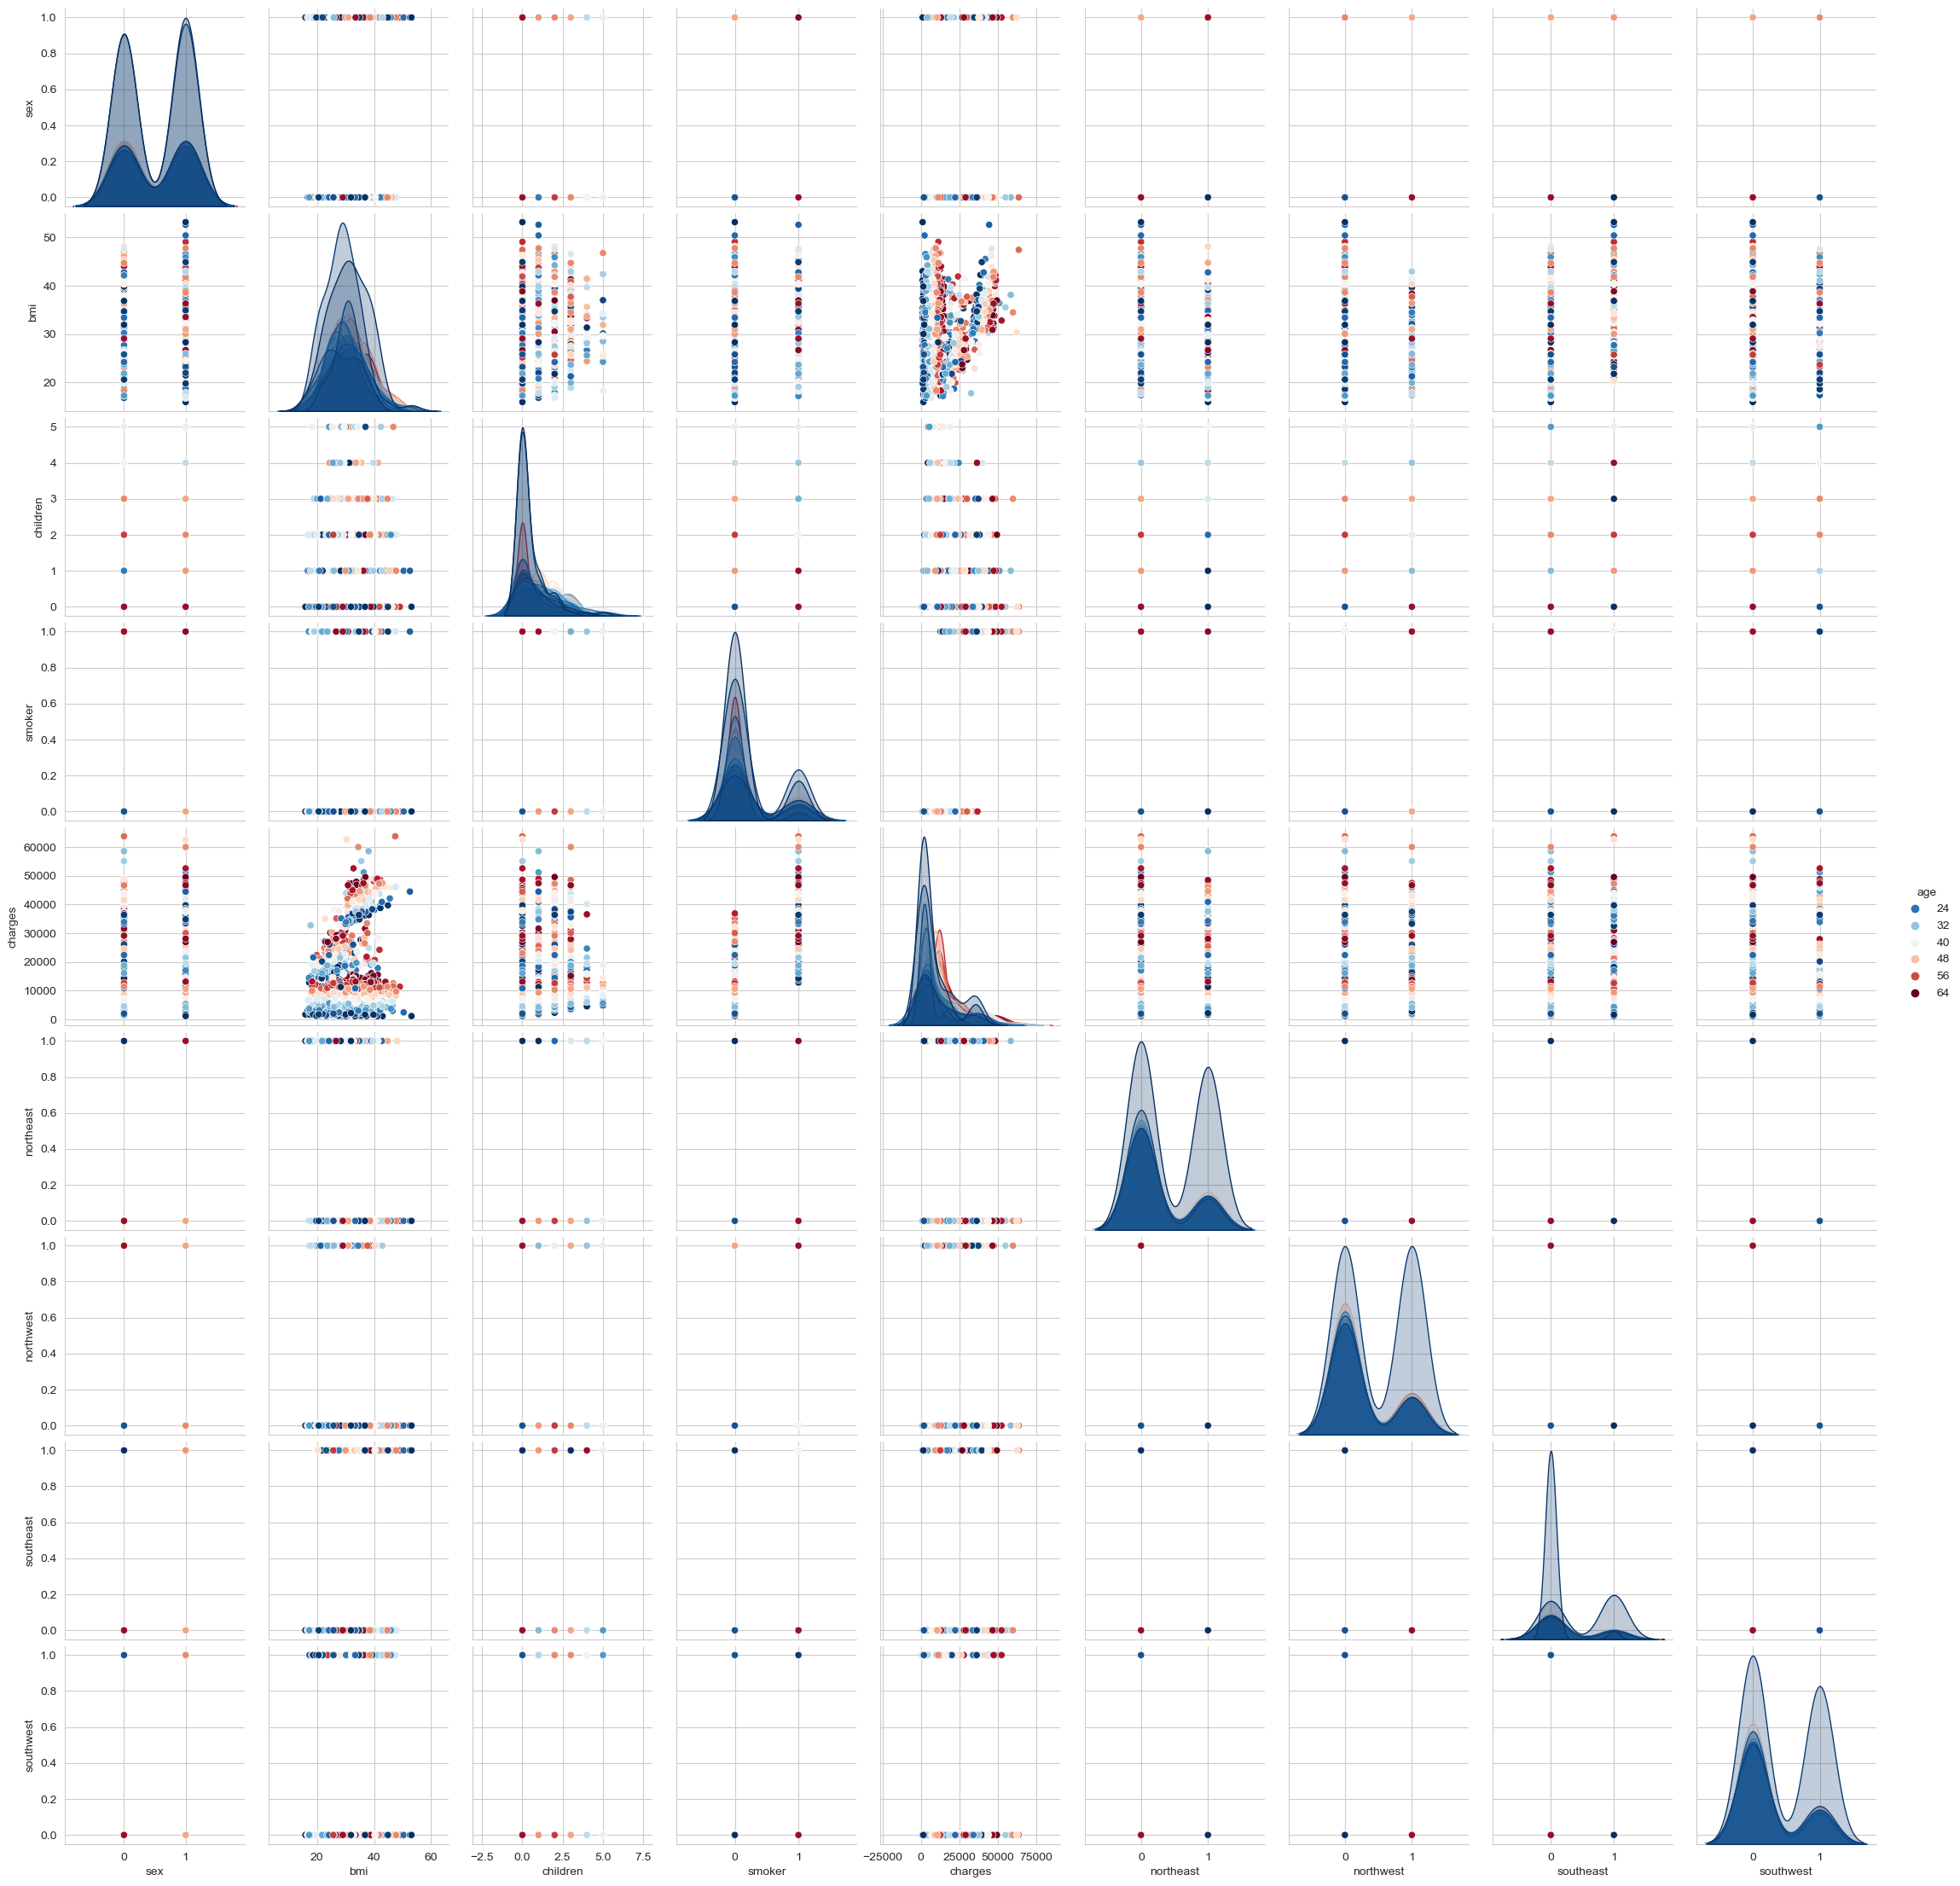

In [150]:
sns.set_style("whitegrid")

plt.figure()
sns.pairplot(insurance_df, hue="age", palette="RdBu_r")

plt.show()

<Axes: >

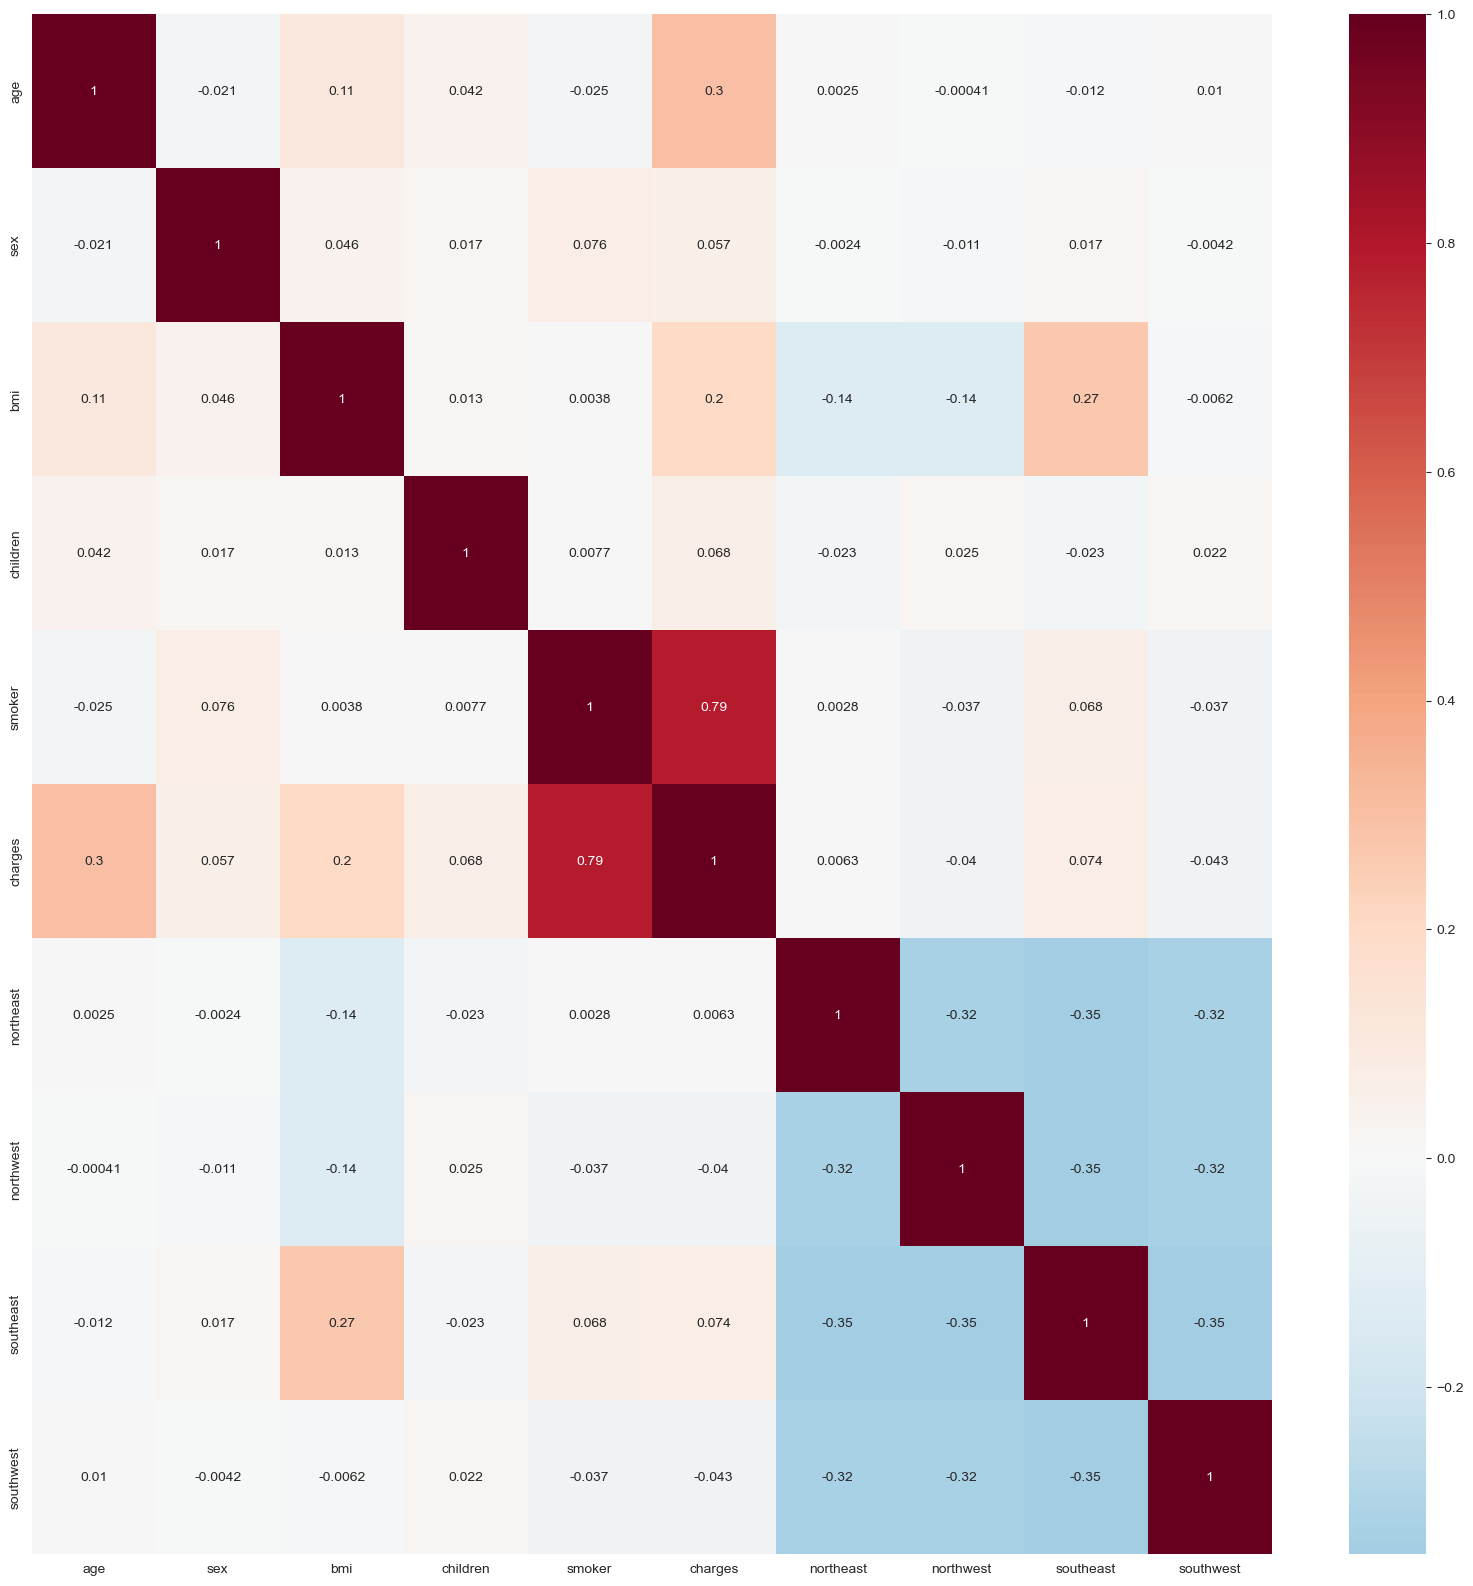

In [151]:
#correlation matrix
sns.set_style("whitegrid")

corrmat= insurance_df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot=True, cmap="RdBu_r", center=0)

In [154]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [155]:
X=insurance_df.drop(columns=["charges"])
X = np.array(X).astype('float32')
X.shape

(1338, 9)

In [156]:
y=insurance_df["charges"]
y = np.array(y).astype('float32')
y = y.reshape(-1,1) 
y.shape


(1338, 1)

In [157]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


In [158]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1070, 9)
X_test:  (268, 9)
y_train:  (1070, 1)
y_test:  (268, 1)


### TRAIN AND EVALUATE A REGRESSION MODEL IN SCIKIT-LEARN

In [159]:
ridge_model=Ridge()

parameters=[{"alpha":[0.001,0.1,1,1,10,100,1000,10000,100000,1000000,]}]

cv=10

ridge_cv=GridSearchCV(ridge_model, parameters, cv=cv)
ridge_cv.fit(X_train, y_train)

print("tuned hyperparameters :(best estimator) ", ridge_cv.best_estimator_)
print("tuned hyperparameters :(best parameters) ", ridge_cv.best_params_)
print("accuracy :", ridge_cv.best_score_)

tuned hyperparameters :(best estimator)  Ridge(alpha=10)
tuned hyperparameters :(best parameters)  {'alpha': 10}
accuracy : 0.7556645449430188


In [160]:
ridge_cv_accuracy = ridge_cv.score(X_test, y_test)
ridge_cv_accuracy

0.6962189020256924

In [161]:
y_predict=ridge_cv.predict(X_test)

In [162]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
x_test_orig = scaler_x.inverse_transform(X_test)

In [226]:
test_y_data=pd.DataFrame(y_test_orig, columns=["test_y_data"])
predict_y_data=pd.DataFrame(y_predict_orig, columns=["precit_y_data"])
test_x_data=pd.DataFrame(x_test_orig, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'northeast','northwest', 'southeast', 'southwest'])

plot_df = pd.concat([test_x_data, test_y_data, predict_y_data], axis=1)

plot_df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,test_y_data,precit_y_data
0,37.0,1.060232e-08,27.740000,3.000000e+00,-2.227378e-09,1.389884e-08,1.000000e+00,1.487889e-08,5.122970e-10,7281.505371,8150.504883
1,36.0,1.060232e-08,26.885000,1.354246e-08,-2.227378e-09,1.389884e-08,1.000000e+00,1.487889e-08,5.122970e-10,5267.818359,5976.637207
2,59.0,1.000000e+00,37.099998,1.000000e+00,-2.227378e-09,1.389884e-08,5.122970e-10,1.487889e-08,1.000000e+00,12347.171875,15346.620117
3,61.0,1.060232e-08,25.080000,1.354246e-08,-2.227378e-09,1.389884e-08,5.122970e-10,1.000000e+00,5.122970e-10,24513.091797,11107.883789
4,29.0,1.060232e-08,26.030001,1.354246e-08,-2.227378e-09,1.389884e-08,1.000000e+00,1.487889e-08,5.122970e-10,3736.464355,3876.687988


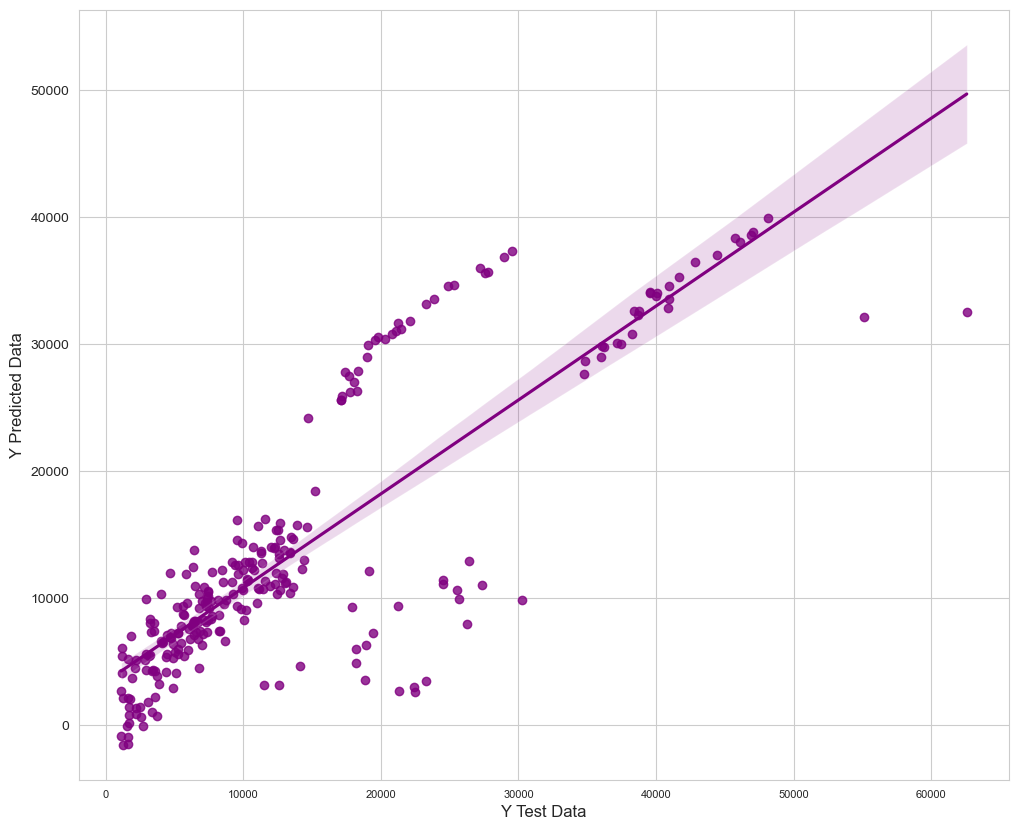

In [225]:
sns.set_style("whitegrid")


plt.figure(figsize=(12,10))

sns.regplot(plot_df, x=plot_df["test_y_data"], y=plot_df["precit_y_data"], color="purple")

plt.xlabel("Y Test Data", fontsize=12, loc="center")
plt.ylabel("Y Predicted Data", 
	    fontsize=12, 
	    loc="center")
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()

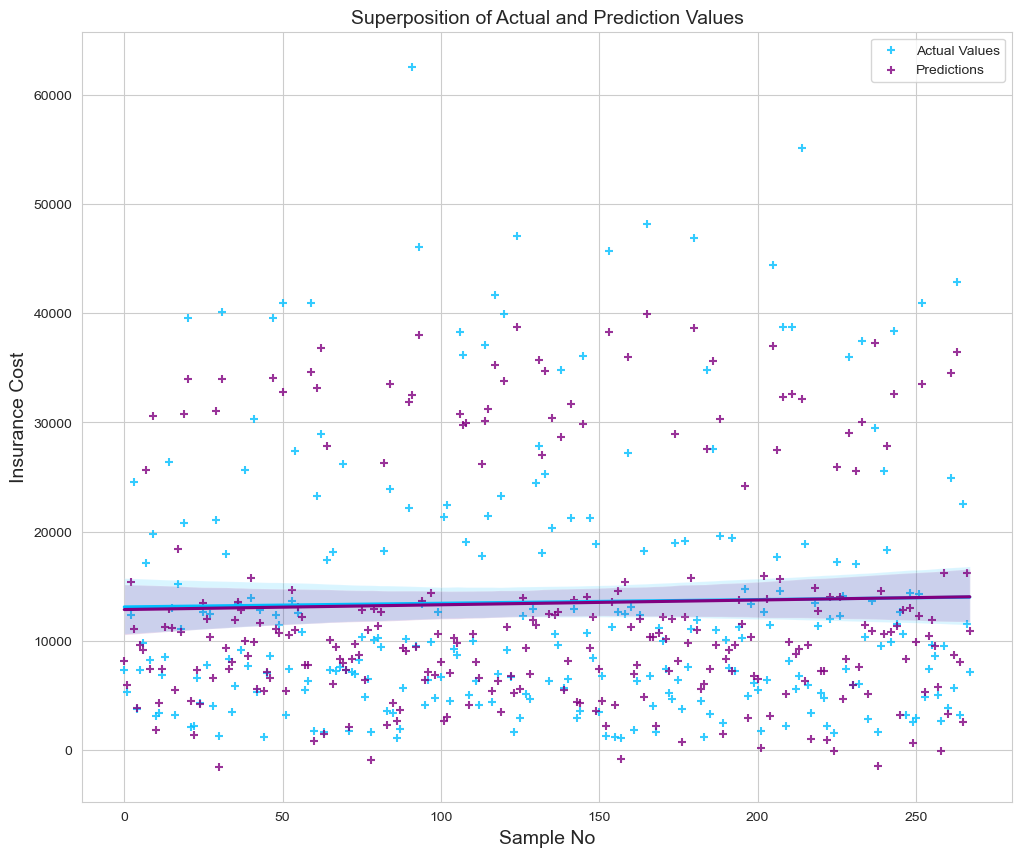

In [220]:
fig = plt.figure(figsize=(12, 10))
sns.regplot(x=pd.DataFrame([range(0,268)]), y=plot_df["test_y_data"], color='deepskyblue', marker='+', label="Actual Values")
sns.regplot(x=pd.DataFrame([range(0,268)]), y=plot_df["precit_y_data"], color="purple", marker='+', label="Predictions")

plt.title('Superposition of Actual and Prediction Values', size=14)
plt.xlabel('Sample No', size=14)
plt.ylabel('Insurance Cost', size=14)
plt.legend()
plt.show()

In [163]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [164]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f')) # Root mean squared error
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)  # coefficient of determination or r-squared
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6527.29 
MSE = 42605510.0 
MAE = 4557.5166 
R2 = 0.6962189190459647 
Adjusted R2 = 0.6856219045940797
